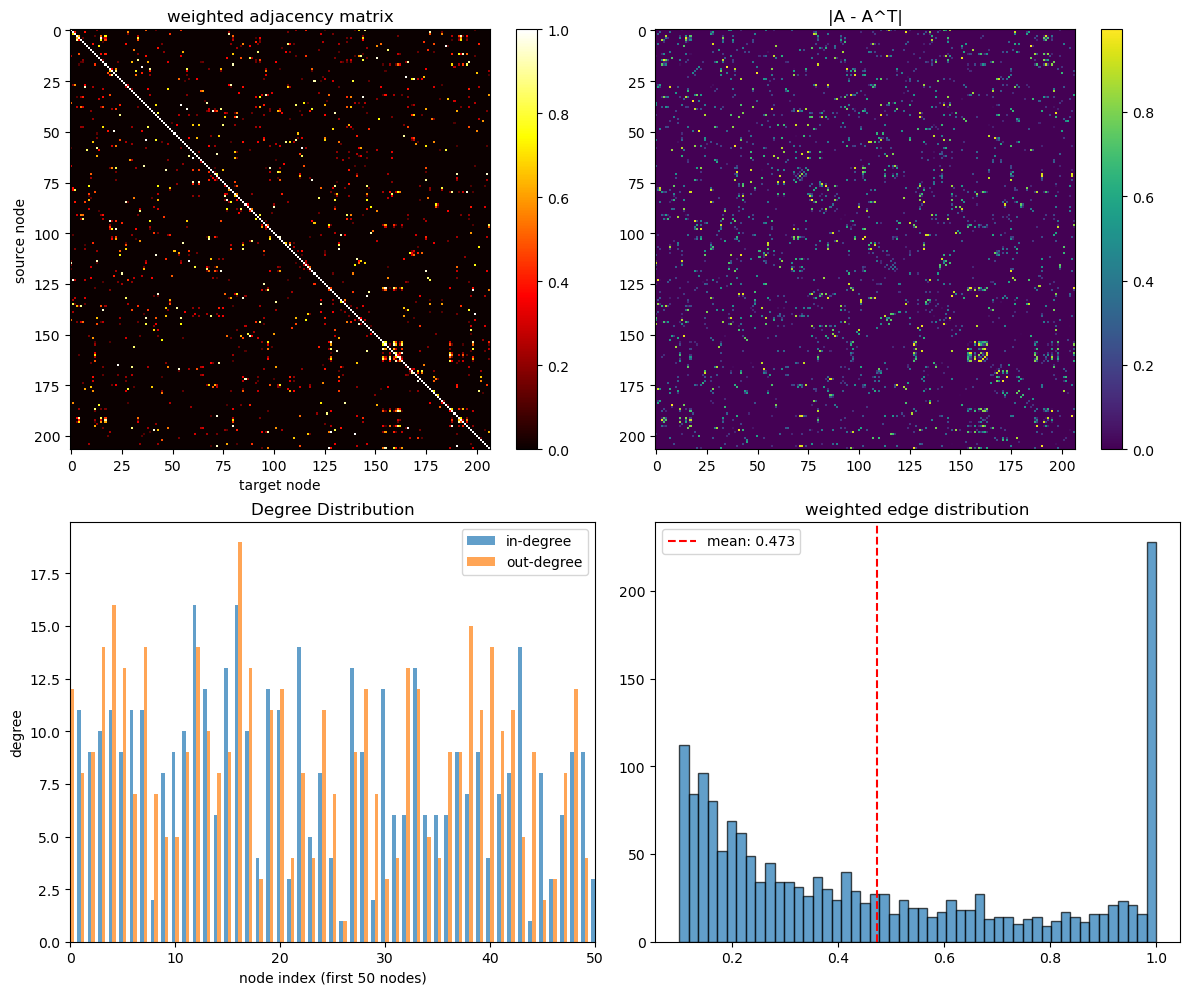


=== 图的对称性分析 ===
完全对称的边对数: 20121
总边数: 1722
对称边比例: 1168.50%

最不对称的边: (8, 185)
  正向权重: 0.9957
  反向权重: 0.0000
  差异: 0.9957


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from dataloading import METR_LAGraphDataset

# 加载图
g = METR_LAGraphDataset()

# 获取邻接矩阵
src, dst = g.edges()
weights = g.edata['weight'].cpu().numpy()

# 创建邻接矩阵
adj = np.zeros((g.num_nodes(), g.num_nodes()))
for i, (s, d) in enumerate(zip(src.numpy(), dst.numpy())):
    adj[s, d] = weights[i]

# 创建可视化
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. 可视化邻接矩阵
ax = axes[0, 0]
im = ax.imshow(adj, cmap='hot', interpolation='nearest')
ax.set_title('weighted adjacency matrix')
ax.set_xlabel('target node')
ax.set_ylabel('source node')
plt.colorbar(im, ax=ax)

# 2. 可视化对称性差异
ax = axes[0, 1]
diff = np.abs(adj - adj.T)
im = ax.imshow(diff, cmap='viridis', interpolation='nearest')
ax.set_title('|A - A^T|')
plt.colorbar(im, ax=ax)

# 3. 度分布
ax = axes[1, 0]
in_degrees = g.in_degrees().numpy()
out_degrees = g.out_degrees().numpy()
x = np.arange(len(in_degrees))
width = 0.35
ax.bar(x - width/2, in_degrees, width, label='in-degree', alpha=0.7)
ax.bar(x + width/2, out_degrees, width, label='out-degree', alpha=0.7)
ax.set_title('Degree Distribution')
ax.set_xlabel('node index (first 50 nodes)')
ax.set_ylabel('degree')
ax.legend()
ax.set_xlim(0, 50)

# 4. 权重分布直方图
ax = axes[1, 1]
ax.hist(weights, bins=50, edgecolor='black', alpha=0.7)
ax.set_title('weighted edge distribution')
ax.axvline(weights.mean(), color='red', linestyle='--', label=f'mean: {weights.mean():.3f}')
ax.legend()

plt.tight_layout()
plt.savefig('graph_analysis.png', dpi=150)
plt.show()

# 打印一些统计信息
print("\n=== 图的对称性分析 ===")
print(f"完全对称的边对数: {np.sum(adj == adj.T) // 2}")
print(f"总边数: {g.num_edges()}")
print(f"对称边比例: {np.sum(adj == adj.T) / 2 / g.num_edges():.2%}")

# 找出最不对称的节点对
max_diff_idx = np.unravel_index(np.argmax(diff), diff.shape)
print(f"\n最不对称的边: ({max_diff_idx[0]}, {max_diff_idx[1]})")
print(f"  正向权重: {adj[max_diff_idx[0], max_diff_idx[1]]:.4f}")
print(f"  反向权重: {adj[max_diff_idx[1], max_diff_idx[0]]:.4f}")
print(f"  差异: {diff[max_diff_idx[0], max_diff_idx[1]]:.4f}")

In [3]:
print(adj)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.39095539 ... 0.         0.         0.        ]
 [0.         0.71743792 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
